In [1]:
!nvidia-smi

Fri Mar 22 10:30:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |   1050MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import gc

In [3]:
from fastai.vision import ImageDataBunch,ImageList,get_transforms,models,cnn_learner,accuracy
import torch

In [4]:
path ='/home/qnkhuat/data/emotion_compilation_split'

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False)

In [6]:
# ran this get erro in THcroe
data = (ImageDataBunch.from_folder(path,test='test',size=48,ds_tfms=tfms,bs=256)
       .normalize())

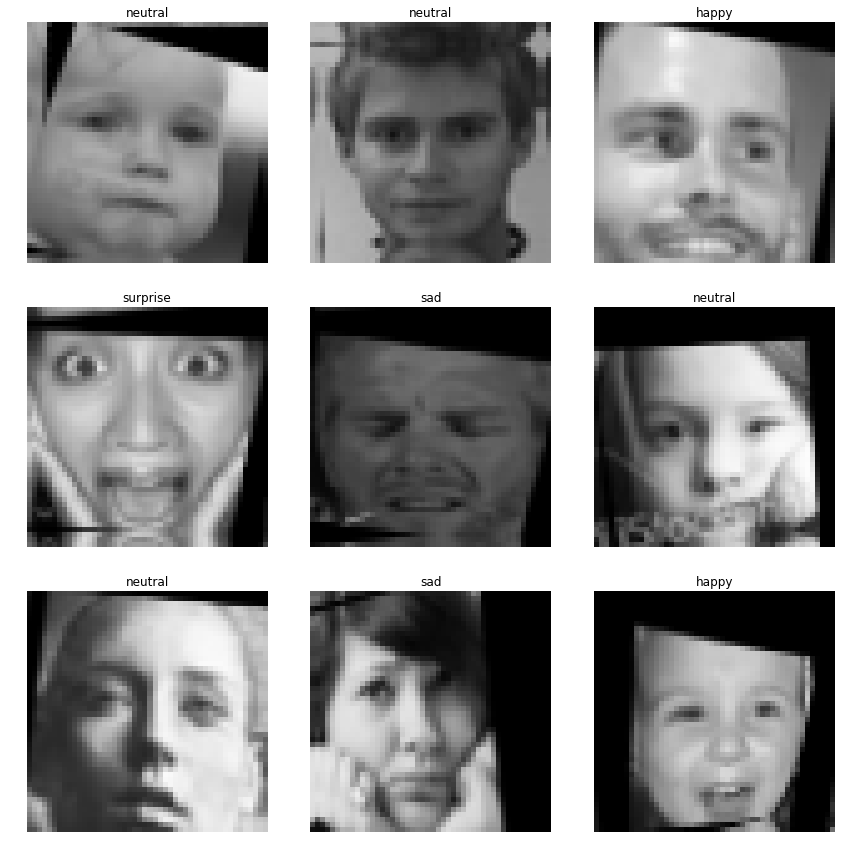

In [7]:
data.show_batch(rows=3)

In [8]:
learn = cnn_learner(data, models.resnet18)

In [9]:
learn.model_dir = '/home/qnkhuat/AI/vision/emotion_retrain/models'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


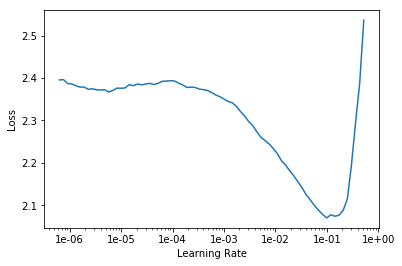

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.metrics = [accuracy]

In [13]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.227486,1.052520,0.636050,00:17
1,1.166931,1.041960,0.638925,00:16
2,1.145681,1.038398,0.637200,00:15


In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


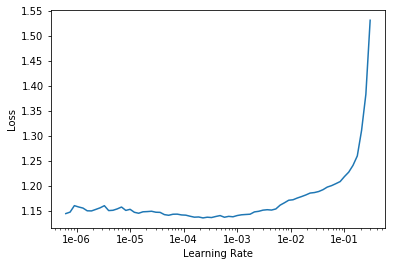

In [15]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.888326,0.881880,0.688084,00:16
1,0.891084,0.835889,0.707201,00:16
2,0.853671,0.760580,0.729481,00:16
3,0.802357,0.713033,0.744574,00:15
4,0.758482,0.697481,0.752767,00:15


In [19]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.765961,0.737645,0.733362,00:14
1,0.801782,0.893730,0.679603,00:16
2,0.767968,0.743812,0.737099,00:17
3,0.730363,0.668251,0.761679,00:17
4,0.699327,0.652577,0.768722,00:16


In [20]:
learn.fit(20,lr=10e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.698499,0.694051,0.752336,00:15
1,0.698950,0.670847,0.757798,00:16
2,0.691546,0.655163,0.765847,00:17
3,0.683238,0.644536,0.765416,00:16
4,0.671593,0.650414,0.770160,00:16
5,0.672404,0.649234,0.765416,00:16
6,0.661981,0.633899,0.771309,00:16
7,0.671643,0.634927,0.770303,00:17
8,0.650799,0.627653,0.775478,00:16
9,0.640904,0.631711,0.773178,00:16


In [21]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.628934,0.639021,0.768866,00:15
1,0.636035,0.619576,0.776772,00:15
2,0.598394,0.588031,0.787408,00:15


In [65]:
learn.save('resnet18_22_3_10_79.6.pth')

In [55]:
#learn.fit(10,lr=10e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.721224,0.696522,0.755067,00:15
1,0.669220,0.751952,0.721432,00:15
2,0.652717,0.666329,0.749030,00:17
3,0.618793,0.629089,0.776484,00:16
4,0.596754,0.614895,0.782521,00:16
5,0.586281,0.605672,0.775765,00:17
6,0.563803,0.611629,0.778640,00:17
7,0.551235,0.626276,0.771022,00:16
8,0.524861,0.688259,0.760098,00:16
9,0.510898,0.607218,0.778784,00:16


In [22]:
learn.freeze()

In [23]:
learn.fit(3,lr=10e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.573903,0.585458,0.788127,00:15
1,0.572768,0.584008,0.787696,00:16
2,0.565022,0.584421,0.787552,00:16


In [24]:
learn.fit(5,lr=10e-5)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [62]:
learn.save('resnet18_22_3_10_80.8.pth')